
# Finite differences for periodic functions

Consider the interval $I := [0,2 \pi)$ and let $f : I \to \mathbb{R}$ periodic. We now want to discretize $f$ and $I$ by vectors in $\mathbb{R}^n$ with $n = 100$:
\begin{align*}
	x :&= \left( 0, h, 2 h , \dots , (n-1) h \right) \in \mathbb{R}^n &\qquad \text{with} \;  h := \frac{2 \pi}{n} \\
	y :&= \left( f(x_1), \dots, f(x_n)\right) \in \mathbb{R}^n&
\end{align*}

If we choose the right step size the difference quotients $D^{(1)}:= D^0$ and $D^{(2)} := D^+ D^-$ are only depended on the function values at $x$. Furthermore, they are linear with respect to the function and hence we can represent them by matrices $D_n^{(1)}, D_n^{(2)} \in \mathbb{R}^{n \times n}$. 
One can show, that the resulting matrices for periodic functions look like this:
\begin{equation*}
	D_n^{(1)} = \frac{1}{2 h} \begin{pmatrix}
		0 & 1 & &  -1 \\
		-1 & 0 & \ddots &  \\
		& \ddots & \ddots &  1 \\
		1 & & -1 & 0 
	\end{pmatrix} \quad \text{and} \quad 
	D_n^{(2)} = \frac{1}{h^2} \begin{pmatrix}
		-2 & 1 & &  1 \\
		1 & -2 & \ddots &  \\
		& \ddots & \ddots &  1 \\
		1 & & 1 & -2 
	\end{pmatrix} 
\end{equation*}
where we leave the parts of matrix empty that only contain zeros. 


## Exercise a)

Construct the matrices $D_n^{(1)}, D_n^{(2)} \in \mathbb{R}^{n \times n}$ as sparse matrices. 


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg

n = 100        #dimension of the matrix /  n*n grid points
h = 2*np.pi/n  #step length

D_1 = np.zeros((n,n)) #generate a n*n zero matrix
e1 = -1   # index of the element equal to -1 in the first row
e2 = -n+1 # index of the element equal to 1 in the first row
for i in range(n):
    D_1[i,e1+i]=-1  #element equal to -1 in i row
    D_1[i,e2+i]=1   #element equal to 1 in i row
D_1 = D_1/2/h
print(D_1)    #print the sparse matrix Dn^1
        
D_2 = np.zeros((n,n)) #generate a n*n zero matrix
e1 = -1   # index of the first element equal to 1 in the first row
e2 = -n   # index of the element equal to -2 in the first row
e3 = -n+1 # index of the second element equal to 1 in the first row
for i in range(n):
    D_2[i,e1+i]=1  #element equal to 1 in i row
    D_2[i,e2+i]=-2 #element equal to -2 in i row
    D_2[i,e3+i]=1  #element equal to 1 in i row
D_2 = D_2/(h**2)
print(D_2)    #print the sparse matrix Dn^2

[[ 0.          7.95774715  0.         ...  0.          0.
  -7.95774715]
 [-7.95774715  0.          7.95774715 ...  0.          0.
   0.        ]
 [ 0.         -7.95774715  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          7.95774715
   0.        ]
 [ 0.          0.          0.         ... -7.95774715  0.
   7.95774715]
 [ 7.95774715  0.          0.         ...  0.         -7.95774715
   0.        ]]
[[-506.60591821  253.30295911    0.         ...    0.
     0.          253.30295911]
 [ 253.30295911 -506.60591821  253.30295911 ...    0.
     0.            0.        ]
 [   0.          253.30295911 -506.60591821 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ... -506.60591821
   253.30295911    0.        ]
 [   0.            0.            0.         ...  253.30295911
  -506.60591821  253.30295911]
 [ 253.30295911    0.            0.         ...    0.
   253.30295911 -506.60591821]]


## Exercise b)

Discretize $\cos(x)$ and apply $D_n^{(1)}, D_n^{(2)}$ to the obtained vector. Plot the results into the same figure as the correct derivatives evaluated on the points $x_i$. Label all graphs accordingly.

Text(0.5, 1.0, 'Plot of Dn^2*y and correct second derivative of cos(x)')

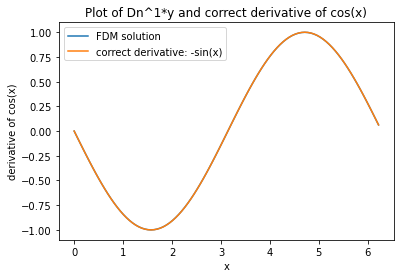

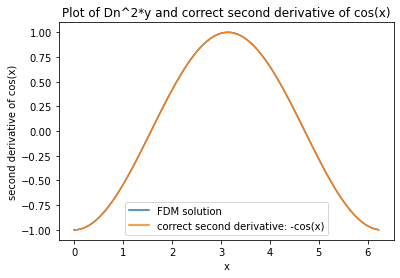

In [5]:
# discretize
x = [j*h for j in range(n)]  # discretize x in domain by the step length h
y = np.cos(x) #discretize cos(x)
y1 = np.dot(D_1,y) #the product of Dn^1 and cos(x) 
y2 = np.dot(D_2,y) #the product of Dn^1 and cos(x)

# plot the result
plt.figure(1)
plt.plot(x,y1,label='FDM solution') #plot Dn^1*y
plt.plot(x,-np.sin(x),label='correct derivative: -sin(x)') #plot correct derivative of cos(x)
plt.legend() 
plt.xlabel('x')
plt.ylabel('derivative of cos(x)')
plt.title('Plot of Dn^1*y and correct derivative of cos(x)')

plt.figure(2)
plt.plot(x,y2,label='FDM solution') #plot Dn^2*y
plt.plot(x,-np.cos(x),label='correct second derivative: -cos(x)') #plot correcr second derivative of cos(x)
plt.legend()
plt.xlabel('x')
plt.ylabel('second derivative of cos(x)')
plt.title('Plot of Dn^2*y and correct second derivative of cos(x)')
#I plot the graph of the derivative and the second derivative of cos(x) separately.
#The curve of D*y coincides with that of the correct derivatives of cos(x)

## Exercise c)

Create a function that computes $| D^0 \sin(x) - \partial_x \sin(x) | $ at $x = \pi$ and takes $h$ as an input parameter. Then create a log-log plot for $h$ ranging from $10^{-8}$ to $10^{-1}$ against the error. Also include the theoretical upper bound for the error.

Text(0.5, 1.0, 'plot of the actual error and theoretical upper bound for the error')

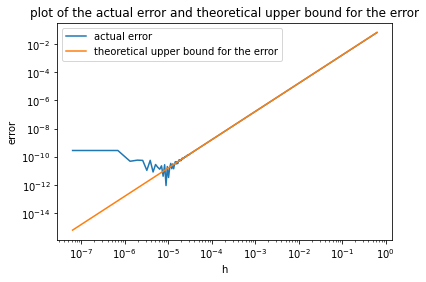

In [6]:
def diff_quotient_err(x, h):
    dx = (np.sin(x+h)-np.sin(x-h))/2/h  #D^0sin(x)
    return abs(dx-np.cos(x)) #D^0sin(x)-cos(x)
    
# Choose good h_1,...,h_n
h = 2*np.pi*10**(-8)*np.arange(1,10**7,10) #h=2pi/10^8....2pi/10^1 
err_list = [diff_quotient_err(np.pi, i ) for i in h] #error list

# Use matplotlibs loglog function and plot the result
plt.loglog(h,err_list,label='actual error')
plt.loglog(h,(h**2)*(1/6),label='theoretical upper bound for the error') 
'''
since for x=pi, the third derivative of sin(x) has minimum value -1, which means the maximum value of the absolute value of the third derivative
is 1. And because h is small enough, we directly let the theoretical upper bound R3 equal to (1/6)*h**2.  
'''
plt.xlabel('h')
plt.ylabel('error')
plt.legend()
plt.title('plot of the actual error and theoretical upper bound for the error')

## Exercise d)

Find the eigenvectors to the $k=5$ eigenvalues of smallest magnitude for $D^{(2)}_n$ and plot them as a function.
<b> Ungraded: </b> Can you explain the result ?

Text(0.5, 1.0, 'Plot of the eigenvectors of the k=5 eigenvalues with the smallest magnitude')

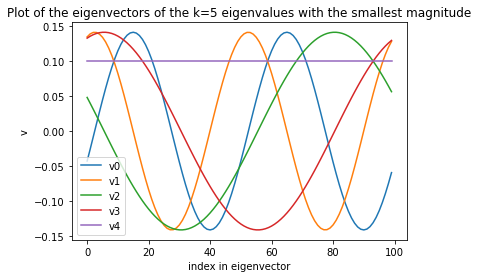

In [7]:
# Note D^(2) is symmetric and thus you can use faster eigensolver
# use sp.sparse.linalg.eigsh
k = 5
lam, V = sp.sparse.linalg.eigsh(D_2,k=k,which='SM') #use sp.spare.linalg.eigsh to find the eigenvectors
# Plot the result
x = range(n)
for i in range(5):
    plt.plot(x,V[:,i])  #plot 5 eigenvectors
plt.legend(['v0','v1','v2','v3','v4'])
plt.xlabel('index in eigenvector')
plt.ylabel('v')
plt.title('Plot of the eigenvectors of the k=5 eigenvalues with the smallest magnitude')